In [50]:
import pandas as pd
import numpy as np
import pylab as plt
plt.style.use('ggplot')

(0.8, 0.9643510609257033)

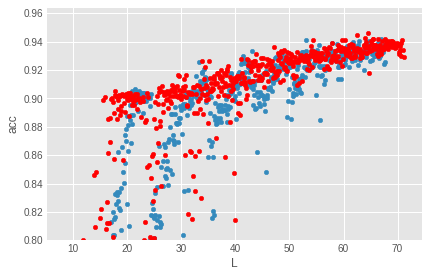

In [51]:
df=pd.read_csv('pXhase2results//RESDSM2_.csv')
#df=df.groupby(['nest','maxdepth']).max().reset_index()
#df=df[df.nq_mean<28.9]
df=df.dropna()
df['L'] = [np.round(x,1) for x in df.nq_mean.values]
dfm=df.groupby(['L']).max().reset_index()
dfs=df.groupby(['L']).std().reset_index()
ax=dfm.plot.scatter(x='L',y='acc')
#dfs

#df1=pd.concat([pd.read_csv('/home/ishanu/Dropbox/RESphase1.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_4550.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_new.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_41063.csv'),
#              pd.read_csv('/home/ishanu/Dropbox/RESphase1_125310.csv'),pd.read_csv('/home/ishanu/Dropbox/RESphase1_new_.csv')])
df1=pd.read_csv('pXhase2results/RESphase2_.csv')

#df1=df1.groupby(['nest','maxdepth']).max().reset_index()

#df1=df1[df1.nq_mean<28.55]
df1=df1.dropna()
df1['L'] = [np.round(x,1) for x in df1.nq_mean.values]
df1m=df1.groupby(['L']).max().reset_index()
df1s=df1.groupby(['L']).std().reset_index()
df1m.plot.scatter(x='L',y='acc',ax=ax,color='r')
#dfs
plt.gca().set_xlim(5,None)
plt.gca().set_ylim(.8,None)


In [4]:

def quantize_dataframe(df):
    """
    Quantize the 'L' column of the dataframe to the nearest 0.5 and then aggregate 
    the other columns using the 'max' function within each collapsed interval.
    
    Parameters:
    - df (pd.DataFrame): Input DataFrame with 'L' and other numerical columns.

    Returns:
    - pd.DataFrame: Quantized DataFrame.
    """
    # Quantize the 'L' column
    #df['L_quantized'] = (df['L'] * 2).round() / 2
    df['L_quantized'] = (df['L']).round()
    
    # Define aggregation for other columns
    aggregation = {col: 'max' for col in df.columns if col != 'L_quantized'}
    aggregation['L'] = 'first'  # For 'L' column, just keep the first value (or replace with 'mean' if required)
    
    # Group by the quantized values
    df_quantized = df.groupby('L_quantized').agg(aggregation).reset_index(drop=True)
    
    # Rename 'L' column to its original name and drop the quantized column
    df_quantized = df_quantized.rename(columns={'L_quantized': 'L'})
    
    return df_quantized

In [5]:
dfm=quantize_dataframe(df).groupby('L').max().sort_values('L').acc.cummax()
df1m=quantize_dataframe(df1).groupby('L').max().sort_values('L').acc.cummax()


<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

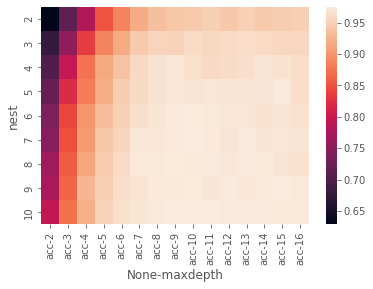

In [6]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df['unc']= df.nq_std*F
df__=df[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

<AxesSubplot:xlabel='None-maxdepth', ylabel='nest'>

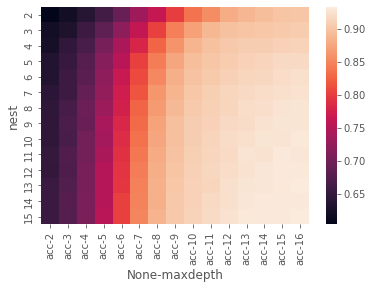

In [7]:
import seaborn as sns
F=2.65/np.sqrt(1500)
df1['unc']= df1.nq_std*F
df__=df1[['acc','nest','maxdepth']]
df__=df__.groupby(['nest','maxdepth']).mean().reset_index()
df___=df__.pivot(index='nest',columns='maxdepth')
sns.heatmap(df___)

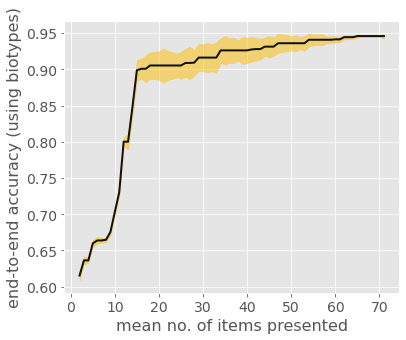

In [8]:
Lqr=df1.groupby('L_quantized').count().run
df1s=df1.groupby('L_quantized').std().sort_index().acc*(2/np.sqrt(Lqr.values))
df1m=df1.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(df1m.index.values,df1m+df1s+epx,df1m-df1s-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
df1m.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (using biotypes)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_upd/Lvsacc_onlybiotype.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(df1m).join(pd.DataFrame(df1s),rsuffix='_std').to_excel('./phase2results_upd/itemsVsacc.xlsx')

In [49]:
dfm.tail(20)

L_quantized
41.0    0.987912
42.0    0.987912
43.0    0.987912
44.0    0.987912
45.0    0.987912
46.0    0.987912
47.0    0.987912
48.0    0.987912
49.0    0.987912
50.0    0.987912
51.0    0.987912
52.0    0.987912
53.0    0.987912
54.0    0.987912
55.0    0.987912
56.0    0.987912
57.0    0.987912
58.0    0.987912
59.0    0.987912
60.0    0.987912
Name: acc, dtype: float64

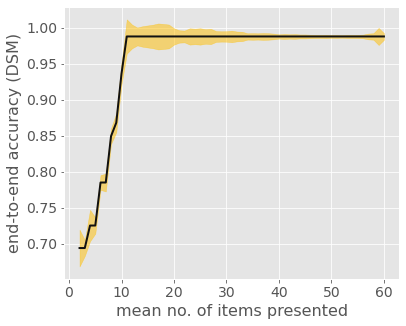

In [10]:
Lqr=df.groupby('L_quantized').count().run
dfs=df.groupby('L_quantized').std().sort_index().acc.ewm(alpha=.51).mean()*(2/np.sqrt(Lqr.values))
dfm=df.groupby('L_quantized').max().sort_index().acc.cummax()

fig=plt.figure(figsize=[6,5])
epx=.0
LW=2
#dfm=df.groupby('L').max().sort_index().acc.ewm(alpha=.1).mean()
#df1m=df1.groupby('L').max().sort_index().acc.cummax().ewm(alpha=.4).mean()
#plt.fill_between(dfm.index.values,dfm+dfs.fillna(0).acc+epx,dfm-dfs.fillna(0).acc-epx,alpha=.5)
#epx=.0
plt.fill_between(dfm.index.values,dfm+dfs+epx,dfm-dfs-epx,alpha=.5,color='#FFBF00')
#dfm.plot(color='k',lw=LW)
dfm.plot(color='#111111',lw=LW)
#plt.gca().set_ylim(.82,.95)
#plt.gca().set_xlim(10,55)
ax=plt.gca()
FS=16
FS2=14
ax.set_xlabel('mean no. of items presented',fontsize=FS)
ax.set_ylabel('end-to-end accuracy (DSM)',fontsize=FS)
plt.xticks(fontsize=FS2, rotation=0);
plt.yticks(fontsize=FS2, rotation=0);
#ax.legend(['Biotype'],fontsize=FS,bbox_to_anchor=(.85, .35),ncol=1)
plt.savefig('./phase2results_upd/Lvsacc_onlyDSM.png',dpi=300,bbox_inches='tight',transparent=True)
#ax=df.groupby('L').max().sort_index().acc.ewm(alpha=.2).mean().plot()
#df1.groupby('L').max().sort_index().acc.ewm(alpha=.8).mean().plot(ax=ax)
pd.DataFrame(dfm).join(pd.DataFrame(dfs),rsuffix='_std').to_excel('./phase2results_upd/itemsVsacc_DSM.xlsx')

In [11]:
df1[df1.acc.between(.91,.92)].sort_values('L',ascending=False)

,c1,c2,acc,s1,s2,nq_mean,nq_std,maxdepth,nest,run,L,L_quantized,unc
2304,0.95,0.94,0.911800,0.919964,0.967285,69.755703,2.447202,11,15,10,69.8,70.0,0.167444
1465,0.95,0.95,0.918552,0.934884,0.952560,69.590304,2.625269,12,15,6,69.6,70.0,0.179628
1048,0.99,0.94,0.917415,0.819815,0.972396,69.398289,3.090541,15,15,4,69.4,69.0,0.211463
1464,0.95,0.95,0.913328,0.919840,0.936132,69.180608,2.712400,11,15,6,69.2,69.0,0.185590
2934,0.95,0.99,0.919437,0.929687,0.812692,69.163498,2.400863,11,15,13,69.2,69.0,0.164274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.99,0.94,0.916107,0.846374,0.936270,30.826996,4.146614,16,3,1,30.8,31.0,0.283723
4019,0.94,0.99,0.913474,0.913788,0.831080,30.430608,4.624075,16,3,19,30.4,30.0,0.316392
4227,0.95,0.95,0.913150,0.928161,0.925003,29.495247,3.909501,14,3,20,29.5,30.0,0.267499
2548,0.99,0.99,0.916018,0.806070,0.833896,29.478137,4.963028,15,3,12,29.5,30.0,0.339584


In [12]:
# we can choose 15-3 for L~25 (acc~.92)
# we can choose 14-2 for L~13 items presented (acc~0.89)

In [13]:
#df1m_=df1.groupby('L').mean()

In [14]:
#df1m_.reset_index()[df1m_.reset_index().L.between(20,32)].set_index('L').acc.plot()

In [15]:
# get importance bounds
modelname='pXhase2results/P2_12_10_29.mod'
# load model
import dill
with open(modelname,'rb') as f:
    M=dill.load(f)
    
def getCF(Rs,LABELS=['B1','B2','B3']):  
    CF=np.zeros([3,3])
    s2=Rs.s1
    s3=Rs.s2
    c2=Rs.c1
    c3=Rs.c2
    CF=[[c2*c3,1-c2,c2*(1-c3)],[(1-s2)*(1-s3),s2,(1-s2)*s3],[c2*(1-s3),1-c2,c2*s3]]

    CF=pd.DataFrame(CF,columns=LABELS)
    CF.index=CF.columns
    return CF

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
df1_=df1[(df1.nest>=2) & (df1.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df1_.iterrows():
    count=count+1
    cf=getCF(i[1])
    cfvar=getCF(i[1])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_upd/confusion_phase2.csv')
S_

,B1,B2,B3
B1,"0.934 (0.903, 0.965)","0.036 (0.015, 0.057)","0.03 (0.009, 0.051)"
B2,"0.011 (0.005, 0.017)","0.89 (0.85, 0.93)","0.099 (0.061, 0.137)"
B3,"0.099 (0.056, 0.142)","0.036 (0.015, 0.057)","0.866 (0.818, 0.914)"


In [17]:
S_.to_excel('cfm.xlsx')

In [18]:
df_=df[(df.nest>=2) & (df.maxdepth>=13)]
S=pd.DataFrame()
count=0
for i in df_.iterrows():
    count=count+1
    cf=getCF(i[1],LABELS=['D1','D2',"D5"])
    cfvar=getCF(i[1],LABELS=['D1','D2',"D5"])**2
    if S.empty:
        S=cf
        V=cfvar
    else:
        S=S+cf
        V=V+cfvar
S=S/count
V=V/count
Sbnd=np.sqrt(V-S**2)*(count/(count-1))
S=S.round(3)
Sbnd=Sbnd.round(3)
S_=S.astype(str)+' ('+(S-Sbnd).round(3).astype(str)+', '+(S+Sbnd).round(3).astype(str)+')'
S_.to_csv('phase2results_upd/confusion_dsm.csv')
S_

,D1,D2,D5
D1,"0.97 (0.948, 0.992)","0.013 (0.001, 0.025)","0.016 (-0.001, 0.033)"
D2,"0.002 (-0.001, 0.005)","0.977 (0.94, 1.014)","0.021 (-0.014, 0.056)"
D5,"0.088 (0.049, 0.127)","0.013 (0.001, 0.025)","0.899 (0.858, 0.94)"


In [23]:

xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)#.head()
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
df=df.dropna()
df0=df
feature_names=df.drop(['DX','Biotype'],axis=1).columns
#feature_names=feature_names[1:]

In [24]:
df.DX.value_counts()

DX
1.0     389
5.0     323
2.0     307
11.0     13
22.0     10
55.0     10
Name: count, dtype: int64

In [25]:
feature_names

Index(['panss_p1', 'panss_p2', 'panss_p3', 'panss_p4', 'panss_p5', 'panss_p6',
       'panss_p7', 'panss_n1', 'panss_n2', 'panss_n3', 'panss_n4', 'panss_n5',
       'panss_n6', 'panss_n7', 'panss_g1', 'panss_g2', 'panss_g3', 'panss_g4',
       'panss_g5', 'panss_g6', 'panss_g7', 'panss_g8', 'panss_g9', 'panss_g10',
       'panss_g11', 'panss_g12', 'panss_g13', 'panss_g14', 'panss_g15',
       'panss_g16', 'madrs_1', 'madrs_2', 'madrs_3', 'madrs_4', 'madrs_5',
       'madrs_6', 'madrs_7', 'madrs_8', 'madrs_9', 'madrs_10', 'young_1',
       'young_2', 'young_3', 'young_4', 'young_5', 'young_6', 'young_7',
       'young_8', 'young_9', 'young_10', 'young_11', 'sfs_setotal',
       'sfs_ictotal', 'sfs_ipcptotal', 'sfs_ipcctotal', 'sfs_retotal',
       'sfs_prototal', 'sfs_oetotal', 'Age', 'Sex', 'BSNIP1vs2', 'Psychosis',
       'BACS_COMP_Z_within', 'BACS_Verb_Mem_within_imputed',
       'BACS_Dig_Seq_z_within_imputed', 'BACS_Tok_Mot_z_within_imputed',
       'BACS_Verb_Flu_z_within_imputed

In [26]:
#MODELS

In [27]:
import glob
MODELS=glob.glob('pXhase2results/P2_14_*')+glob.glob('pXhase2results/P2_15_*')
I={}
for modelname in MODELS:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP3=M[3]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio3_vs_all':IMP3,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    I[modelname]=IMPdf.transpose().reset_index()
I=pd.concat(I.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or i

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [28]:
from itertools import cycle, islice
custom_colors = list(islice(cycle(['#AF1D1D','#4575F0','#1AB44A']), None, 3))
plt.style.use('seaborn-whitegrid')

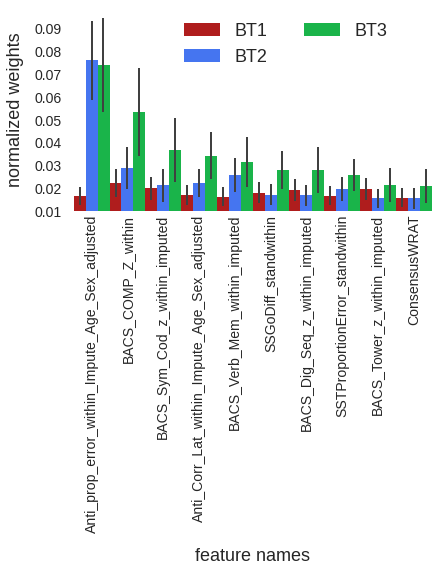

In [29]:
fig=plt.figure(figsize=[6,3.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()

sImean=Imean.sort_values('bio3_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsd=Isd.loc[:,sImean.columns]


FS=18
FS2=14
w=0.33
LW=2
COL='.25'



sImean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImean.columns)), sImean.loc['bio2_vs_all',:].values,
             sIsd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))-w, sImean.loc['bio1_vs_all',:].values,
             sIsd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(sImean.columns))+w, sImean.loc['bio3_vs_all',:].values,
             sIsd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=2)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=10)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2, rotation=0);
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.savefig('phase2results_upd/sorted_impPhase2.png',dpi=300,bbox_inches='tight',transparent=True)

In [30]:
sImean.columns

Index(['Anti_prop_error_within_Impute_Age_Sex_adjusted', 'BACS_COMP_Z_within',
       'BACS_Sym_Cod_z_within_imputed',
       'Anti_Corr_Lat_within_Impute_Age_Sex_adjusted',
       'BACS_Verb_Mem_within_imputed', 'SSGoDiff_standwithin',
       'BACS_Dig_Seq_z_within_imputed', 'SSTProportionError_standwithin',
       'BACS_Tower_z_within_imputed', 'ConsensusWRAT'],
      dtype='object')

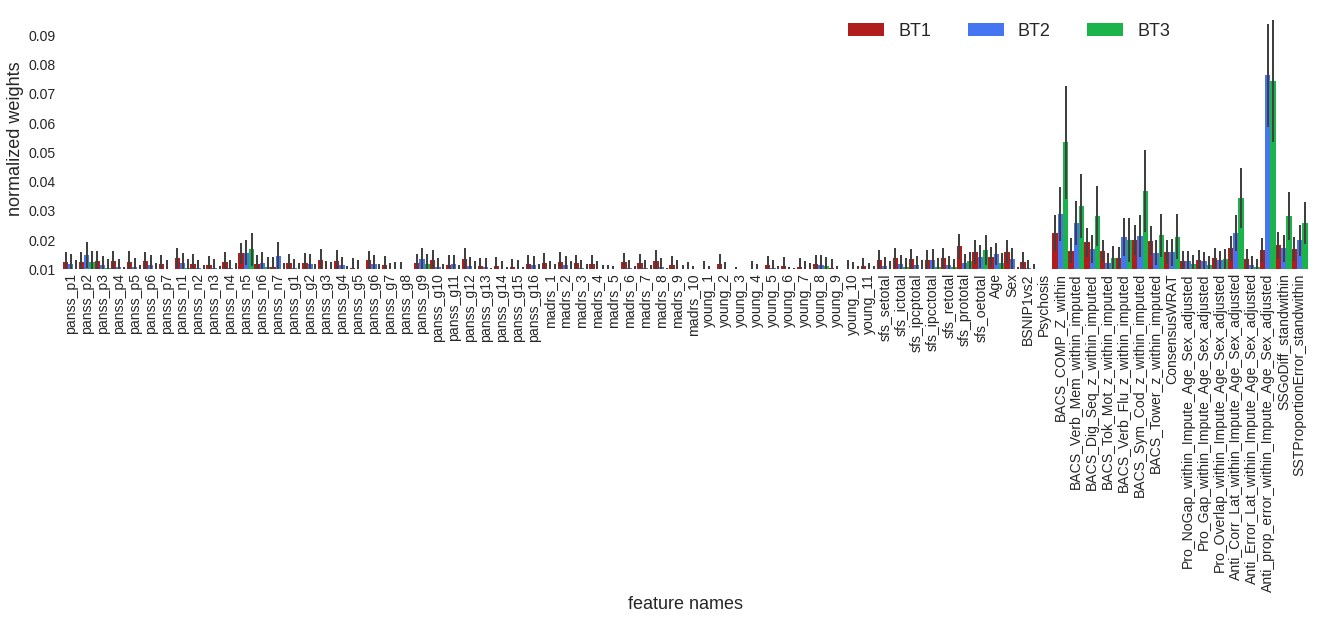

In [31]:
fig=plt.figure(figsize=[20,4.5])
Imean=I.groupby('index').mean()
Isd=I.groupby('index').std()
FS=18
FS2=14
w=0.33
LW=2
COL='.25'
Imean.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imean.columns)), Imean.loc['bio2_vs_all',:].values,
             Isd.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))-w, Imean.loc['bio1_vs_all',:].values,
             Isd.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)
plt.errorbar(np.arange(len(Imean.columns))+w, Imean.loc['bio3_vs_all',:].values,
             Isd.loc['bio3_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=1)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
#plt.legend(bbox_to_anchor=(.5, 1), loc='upper left', borderaxespad=0)
plt.gca().legend(['BT1','BT2','BT3'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.01,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);

plt.savefig('phase2results_upd/impPhase2.png',dpi=300,bbox_inches='tight',transparent=True)

In [32]:
Imean.transpose().join(Isd.transpose(),rsuffix='_cnfband').to_excel('./phase2results_upd/feature_impotance_biotype.xlsx')

In [33]:
custom_colors = list(islice(cycle(['.1','.4','.7']), None, 3))

In [34]:
import glob
MODELSdsm=glob.glob('pXhase2results/DSM2_13_*')+glob.glob('pXhase2results/DSM2_14_*')
Idsm={}
for modelname in MODELSdsm:
    with open(modelname,'rb') as f:
        M=dill.load(f)

    IMP1=M[1]['estimator'].feature_importances_
    IMP2=M[2]['estimator'].feature_importances_
    IMP5=M[5]['estimator'].feature_importances_
    plt.style.use('fivethirtyeight')
    plt.style.use('ggplot')
    IMPdf=pd.DataFrame({'bio5_vs_all':IMP5,'bio2_vs_all':IMP2,'bio1_vs_all':IMP1})
    IMPdf.index=feature_names
    Idsm[modelname]=IMPdf.transpose().reset_index()
Idsm=pd.concat(Idsm.values())    

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ishanu/.local/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or in

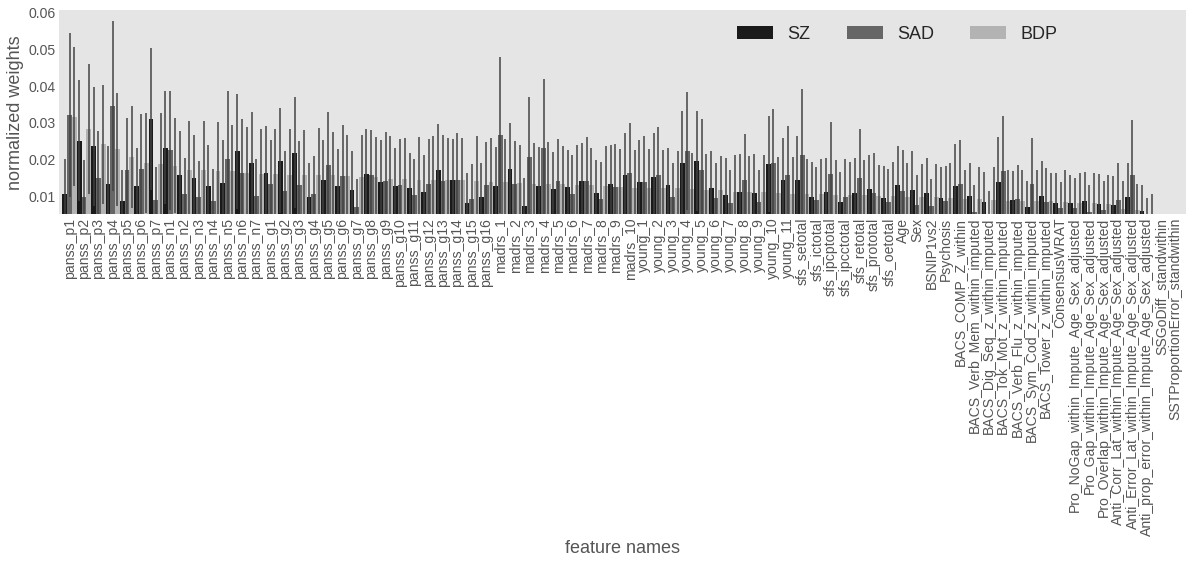

In [35]:
fig=plt.figure(figsize=[18,3.5])
Imeandsm=Idsm.groupby('index').mean()
Isddsm=Idsm.groupby('index').std()

Imeandsm=Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False)
Isddsm=Isddsm.transpose()
Isddsm=Isddsm.loc[Imeandsm.index,:]
Isddsm=Isddsm.transpose()
Imeandsm=Imeandsm.transpose()

FS=18
FS2=14

w=0.33
LW=2
COL='.25'
Imeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(Imeandsm.columns)), Imeandsm.loc['bio2_vs_all',:].values,
             Isddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))-w, Imeandsm.loc['bio1_vs_all',:].values,
             Isddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(Imeandsm.columns))+w, Imeandsm.loc['bio5_vs_all',:].values,
             Isddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=3)
ax=plt.gca()
ax.set_ylim(0.0051,None)
ax.set_xlabel('feature names',fontsize=FS)
ax.set_ylabel('normalized weights',fontsize=FS)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_upd/impDSM2.png',dpi=300,bbox_inches='tight',transparent=True)

In [36]:
sImeandsm=Imeandsm.sort_values('bio5_vs_all',axis=1,ascending=False).iloc[:,:10]
sIsddsm=Isddsm.loc[:,sImeandsm.columns]


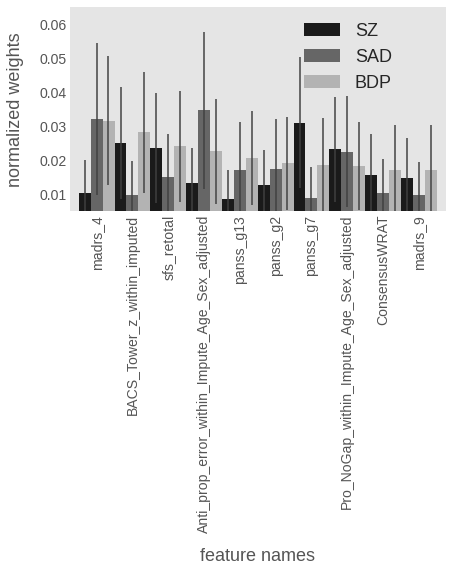

In [37]:
fig=plt.figure(figsize=[6,3.5])
FS=18
FS2=14

w=0.33
LW=2
COL='.25'
sImeandsm.transpose().plot(kind='bar',ax=plt.gca(),width=1,color=custom_colors)
plt.errorbar(np.arange(len(sImeandsm.columns)), sImeandsm.loc['bio2_vs_all',:].values,
             sIsddsm.loc['bio2_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))-w, sImeandsm.loc['bio1_vs_all',:].values,
             sIsddsm.loc['bio1_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)
plt.errorbar(np.arange(len(sImeandsm.columns))+w, sImeandsm.loc['bio5_vs_all',:].values,
             sIsddsm.loc['bio5_vs_all',:].values,lw=LW,ls='none',color=COL,alpha=.75)

#plt.gca().set_xticks(np.arange(len(feature_names)))
#plt.gca().set_xticklabels(feature_names,rotation=90);
plt.gca().legend(['SZ','SAD','BDP'],fontsize=FS,bbox_to_anchor=(.9, 1),ncol=1)
ax=plt.gca()
ax.set_ylim(0.0051,0.065)
ax.set_xlabel('feature names',fontsize=FS,labelpad=15)
ax.set_ylabel('normalized weights',fontsize=FS,labelpad=15)
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=FS2, rotation=90);
plt.yticks(fontsize=FS2);
plt.savefig('phase2results_upd/sorted_impDSM.png',dpi=300,bbox_inches='tight',transparent=True)

In [38]:
Imeandsm

,madrs_4,BACS_Tower_z_within_imputed,sfs_retotal,Anti_prop_error_within_Impute_Age_Sex_adjusted,panss_g13,panss_g2,panss_g7,Pro_NoGap_within_Impute_Age_Sex_adjusted,ConsensusWRAT,madrs_9,...,panss_g4,young_8,young_10,young_9,madrs_10,panss_g8,panss_g5,young_3,Psychosis,BSNIP1vs2
index,,,,,,,,,,,,,,,,,,,,,
bio1_vs_all,0.010408,0.024990,0.023492,0.013258,0.008652,0.012685,0.030992,0.023130,0.015736,0.014775,...,0.010025,0.008047,0.008102,0.008540,0.007685,0.007432,0.009829,0.005826,0.0,0.0
bio2_vs_all,0.031981,0.009843,0.015019,0.034573,0.017132,0.017301,0.008950,0.022427,0.010438,0.009833,...,0.008444,0.006670,0.006732,0.005751,0.006089,0.008904,0.015825,0.003693,0.0,0.0
bio5_vs_all,0.031611,0.028126,0.024036,0.022655,0.020621,0.019018,0.018685,0.018280,0.017136,0.017118,...,0.008598,0.008362,0.008110,0.007942,0.007692,0.006548,0.006275,0.004683,0.0,0.0


In [39]:
Imeandsm.transpose().sort_values('bio5_vs_all',ascending=False).to_excel('phase2results_upd/dsmfeaturessorted.xlsx')
Imean.transpose().sort_values('bio3_vs_all',ascending=False).to_excel('phase2results_upd/phase2featuressorted.xlsx')

In [40]:

def getAVlen(clf,X,cid=0):
    RES=pd.DataFrame(columns=['Lmean','Lstd','compid'])
    count=0
    threshold={}
    feature={}
    node_indicator={}
    leaf_id={}

    for i in clf.estimators_:
        feature[count]= i.tree_.feature
        node_indicator[count] = i.tree_.decision_path(X)
        count=count+1
    
    #print(count)
    L=[]
    LL=[]
    for sample_id in np.arange(len(X)):
        L=[]
        for i in range(count-1):
            L=L+list(feature[i][node_indicator[i].indices[node_indicator[i].indptr[sample_id] : node_indicator[i].indptr[sample_id + 1]]][1:-1])
        LL=np.append(LL,len(list(set(L))))
    L=list(set(L))
    
    RES['Lmean']=[np.mean(LL)]
    RES['Lstd']=[np.std(LL)]
    RES['compid']=[cid]
    return RES    
    


In [41]:
Ef=pd.read_excel('./2022summer/adeptphase3/BIOTYPES_HC_withBiofactors_21_1008.xlsx')
Ef_=Ef[['DSM','DSM String']].dropna()
Ef_.DSM=[int(x) for x in Ef_.DSM.values]
xf=pd.read_csv('./2022summer/adeptphase2/Cognition.csv',index_col=0)
xf.index.name='subject_id'
df=pd.read_csv('combined_bsnip.csv',index_col=0).drop('DSM',axis=1)
df=df.join(xf)
DELVAR=['project','BACS_COMP_Z']
cols=[x for x in df.columns if x not in DELVAR]
df=df[cols]
Xphase1=df.dropna().iloc[:,1:].values.astype(np.float32)

df=df.join(Ef_).dropna()#[['DSM','Biotype']]
df=df[df['DSM String']!='HC'].drop(['Biotype','DSM String'],axis=1)
Xdsm=df.drop('DSM',axis=1).values.astype(np.float32)

In [42]:
def getModelAvLen(modelfile='pXhase2results/P2_10_3_0.mod'):
    import sys
    import warnings

    if not sys.warnoptions:
        warnings.simplefilter("ignore")    
        
    with open(modelfile,'rb') as f:
        M=dill.load(f)
    return pd.concat([getAVlen(M[key]['estimator'],Xphase1,cid=key) for key in M.keys()])

In [43]:
import glob
MODELS=glob.glob('pXhase2results/P2_14_2_*.mod')#+glob.glob('P2models/P2_15_3_*.mod')
af=pd.concat([getModelAvLen(model)for model in MODELS])
af

,Lmean,Lstd,compid
0,7.894487,2.085002,1
0,7.888783,3.294480,2
0,7.800380,2.643249,3
0,8.423954,2.231156,1
0,8.683460,2.553904,2
...,...,...,...
0,9.020913,2.386898,2
0,6.119772,2.272105,3
0,9.940114,2.248622,1
0,6.653042,1.154574,2


In [44]:
af[af.compid==1].mean()

Lmean     8.280482
Lstd      2.490647
compid    1.000000
dtype: float64

In [45]:
af[af.compid==2].mean()

Lmean     8.333492
Lstd      2.476997
compid    2.000000
dtype: float64

In [46]:
af[af.compid==3].mean()

Lmean     8.019487
Lstd      2.442594
compid    3.000000
dtype: float64

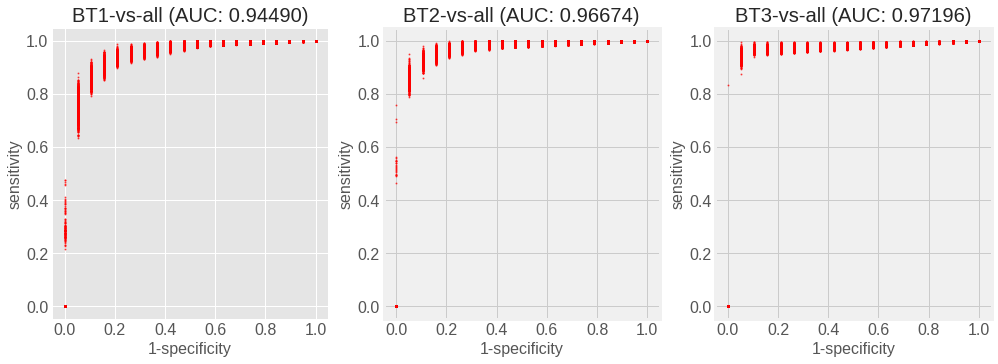

In [47]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase2results/P2_14_2_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_upd/ROC_phase2.png',dpi=400,bbox_inches='tight',transparent=True)


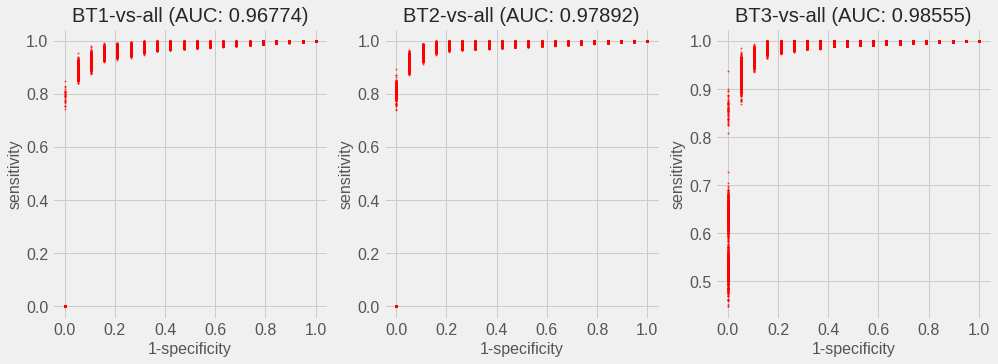

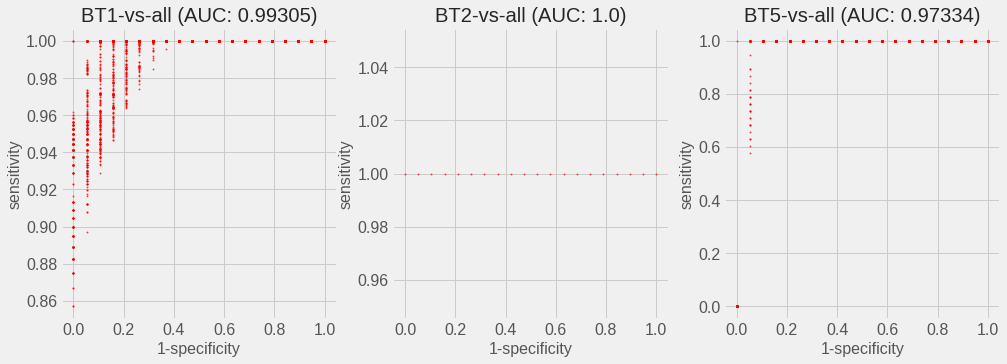

In [48]:
def pltROC(M,VAR,ax,FS=14):
    plt.style.use('fivethirtyeight')
    ROC=M[VAR]['rocs']   
    auc=[]
    for key,crv in ROC.items():
        ax.plot(crv['fpr'],crv['tpr'],'.',ms=2,color='r',alpha=.6)
        auc=np.append(auc,key)
    ax.set_xlabel('1-specificity',fontsize=FS)
    ax.set_ylabel('sensitivity',fontsize=FS)
    plt.setp(ax.get_xticklabels(), fontsize=FS);
    plt.setp(ax.get_yticklabels(), fontsize=FS);
    ax.set_title('BT'+str(VAR)+'-vs-all (AUC: '+ str(auc.mean())[:7]+')' );
   
modelfile='pXhase2results/P2_15_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)
    

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,3,plt.gca(),FS=16)
plt.savefig('./phase2results_upd/ROCvall_phase2_max.png',dpi=400,bbox_inches='tight',transparent=True)



modelfile='pXhase2results/DSM2_12_3_0.mod'
with open(modelfile,'rb') as f:
    M=dill.load(f)

#plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
pltROC(M,1,plt.gca(),FS=16)

plt.subplot(1,3,2)
pltROC(M,2,plt.gca(),FS=16)

plt.subplot(1,3,3)
pltROC(M,5,plt.gca(),FS=16)
plt.savefig('./phase2results_upd/ROCvall_clinical_DSM.png',dpi=400,bbox_inches='tight',transparent=True)



In [ ]:
rho=0.04
s1=.388
PPV1=.146
s=.62
PPV=.178
A= (1 - ((s1*rho)/PPV1))
C= (1-s1)/(1-((s1*rho)/PPV1))
B=A*s*rho*((1/PPV)-1)*C
A,B